<a href="https://www.kaggle.com/bocehu/dlinbmi-assignmnet2-bh2770?scriptVersionId=89374914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Deep Learning In Biomedical Imaging
## BMENE4460-2022-1

### <span style="color:red">Assignment 2</span> - MLP and CNN for [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html)

#### Due date/time: <span style="color:red">March 12, 11:59 pm</span>

#### Introduction
In this assignment, you will implement, train, and test the models explained in [Lecture 6](https://www.kaggle.com/soroush361/dlinbmi-bme-lecture6-partb-mlp-lenetformnist). However, instead of MNIST, you will solve [CIFAR10](http://www.cs.toronto.edu/~kriz/cifar.html) object recognition problem.

#### Instructions:
1. You may use any publicly available resources to answer the questions, but you need to ***cite*** them properly to prevent plagiarism.
2. Using or copying other students' solutions is considered cheating, and you'll be graded **"0" for the entire assignment**.
3. You may be asked to write Python code or to explain something in each question. To write your answers, please use code and markdown blocks, respectively. If you need to better organize your answers, you may add more blocks. In this notebook, we placed a code block with a comment as `# [Your code here]` and a markdown block with the text "<span style="color:red">Your answer here</span>" for each question that needs them. If you wish to answer, please remove the comments first.
4. Please ***use comments at the beginning of each code blocks*** to explain what you've implemented in that block.
5. Please ***use LaTex formatting to write equations and formulas*** in markdown blocks wherever is needed.
6. Please define your variables with ***short and meaningful names***.
7. Please make sure ***internet access is granted*** on the settings panel.
8. For this assignment, you ***need GPU access***. Therefore, please set the "Accelerator" as "GPU" on the "Setting" panel. However, we recommend writing your script without enabling the GPU, and whenever you finish, you may enable the GPU for the final run. This way, you save your GPU access quota.

#### How to submit:
Kaggle automatically saves the notebook after few seconds, and you may close the notebook and come back later to complete it. However, we need you to do the following steps to ensure your answers are visible to us for grading purposes. Thus, after you finished your answers, please:
1. Rename the notebook as "DLInBMI_Assignment2_{YourUNI}" (Replace "{YourUNI}" with your UNI!).
2. Click on the "Save Version" button on the top-right side of the window.
3. On the save popup, save your notebook with: \
    3.1 If the scripts run fast, the "Save & Run All (Commit)" option, \
    3.2 If the scripts run slow, such as training networks, etc., and you are satisfied with the outputs of code blocks, "Quick Save" option.
4. Click on the "Save" button and let the Kaggle saves your notebook.
5. Then click on the "Share" button.
6. On the share popup, change "Private" to "Public".
7. Copy the "Public url", and click on the "Save" button.
8. Paste the "Public url" address on your answers' PDF and submit it on the [CourseWorks](https://courseworks2.columbia.edu/).

**Note:**
1. You may save multiple versions of your notebook, but the latest version is considered as your final answer.
2. If you wish us to grade your answers based on a different version of your notebook other than the latest version, please duplicate this template, copy your answers from your desired version, and follow the same procedure to submit. Again, make sure the name of the notebook remains as the current template.
3. Do not change or save the notebook after the due date/time as it will be considered a late submission and causes a decrease in your final grade.

### <span style="color:red">(10 pts.)</span> New packages and Dataset management.

#### First, run the following code block to import all the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, random_split

import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

from sklearn.metrics import confusion_matrix, accuracy_score

%config Completer.use_jedi = False

#### Execute the following code block to make sure the GPU access is enabled. Also, set the random seed for both `numpy`, and `torch` as 4460.

In [2]:
# check whether the cuda is available
cuda = torch.cuda.is_available()
print("GPU available:", cuda)

torch.manual_seed(4460)
np.random.seed(4460)

GPU available: True


#### As you may noticed, we are importing a new package called `torchvision`. Search for its documentation and briefly explain what does this package contains.

<span style="color:red">The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.</span>


<span style="color:red">For example, this package contains a lot of dataset, like COCO, ImageNet, MNIST, etc. And it also contains famous deep learning model, such as Mask RCNN, shuffleNet, FCN and so on. It also include a large variety of methods to transform the images, such as cropping, graeyscale and padding.</span>

#### Run the code block below to download the CIFAR10 dataset.

In [3]:
# download the cifar 10 dataset and split it into training data, validation data and test data

# 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 2
batch_size = 100

# 3
train_valid_set = CIFAR10(root='./data', train=True, download=True, transform=transform)

# 4
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# 5
trainset, validset = random_split(train_valid_set, [40000, 10000])

# 6
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 7
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

|          | 0/? [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### Since this method of loading datasets is new to you, here we explain what is happening in each line.

<span style="color:lime">1. We defined a `transform` module to convert the CIFAR10 images to `Tensor`, and normalize their intensities so that the range is [-1, 1] for each channel. The original intensities are between [0, 255].</span>

<span style="color:lime">2. The `batch_size` defines the batch size we will use while making the data loaders.</span>

<span style="color:lime">3. On the `train_valid_set`, we will keep a handle (pointer in C/C++ language) of the training samples in the CIFAR10 dataset. The `CIFAR10` function downloads that part if it doesn't exist in the `./data` directory.</span>

<span style="color:lime">4. Similar to `train_valid_set`, the `testset` keeps the samples of the testing set on the CIFAR10 dataset.</span>

<span style="color:lime">5. Using the `random_split` function, we split the `train_valid_set` into `trainset` and `validset`, in which there will be $40,000$ samples in the training set and $10,000$ samples in the validation set.</span>

<span style="color:lime">6. Then we created data loaders for `trainset`, `validset`, and `testset`, naming `trainloader`, `validloader`, and `testloader`, respectively.</span>

<span style="color:lime">7. The `classes` variable keeps the name of the classes of 10 objects that exist in the CIFAR10 dataset. This will be useful when we want to retrieve the English name of the predicted or ground-truth label.</span>

You may use these resources to understand what is happening in more detail:

1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://pytorch.org/vision/stable/index.html

After this, we expect you to understand every variables defined above, including: `transform`, `batch_size`, `train_valid_set`, `trainset`, `validset`, `trainloader`, `validloader`, `testloader`, and `classes`. You should master using `transforms`, `datasets`, and `dataloaders` as it is necessary for your final project.

#### Now that you downloaded the CIFAR10 dataset, and created the datasets and dataloaders instances, answer the following questions about the dataset and plot the first 25 samples (in a 5x5 subplots) of the test set. Also, title each sample with its corresponding label using the `classes` variable.

##### a) What is the images sizes (Width and Height)? 
##### b) How many channels each image has?
##### c) How many batches (not samples) we have in each set (training, validation, and test)? 


Hint: To show the images correctly, first, it would be better to use sets instead of loaders since the loaders return a batch of images/labels, but sets return one sample at a time. Second, consider that the samples pulled from sets contain both the images and the labels. Third, the images are normalized torch tensors in $(C, H, W)$ format, and you need to convert them to a numpy array (`.numpy()` on tensors does the job), reverse the normalization step, and transpose them to become an array of $(H, W, C)$; otherwise, either your plots (using `plt.imshow`) will return an error or will be flipped.

<span style="color:red">a) Width:32 Height:32</span>

<span style="color:red">b) Channels:3</span>

<span style="color:red">c) training:400 validation:100 test:100</span>

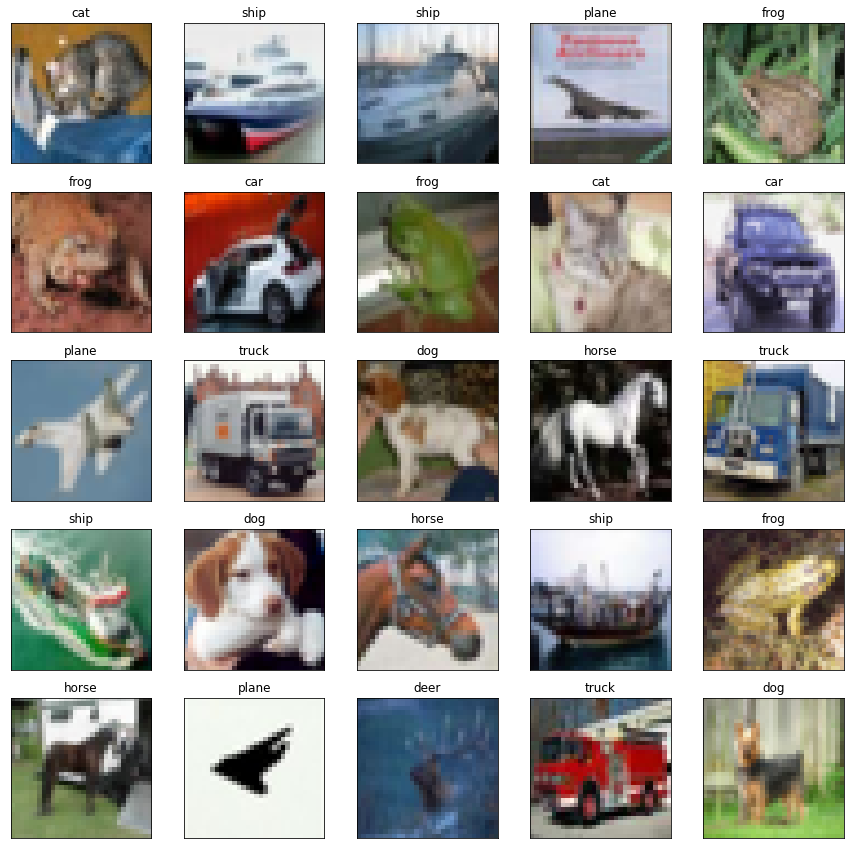

In [4]:
# plot the first 25 samples of the dataset
# the first image's index is zero, so we need (i+1) to indicate the plot position.
row = 5
col = 5
fig = plt.figure(figsize=(15,15))
# [0,25)
for i in range(0,row*col):
    image,label = testset[i]
    image = image/2 + 0.5
    npimage = image.numpy()
    npimage = np.transpose(npimage,(1,2,0))
    ax = fig.add_subplot(row,col,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(classes[label])
    plt.imshow(npimage)

plt.show()

### <span style="color:red">(15 pts.)</span> MLP model

#### Consider the MLP architecture introduced in the [Lecture 6 - Part B - Implementing an MLP and LeNet for MNIST classification](https://www.kaggle.com/soroush361/dlinbmi-bme-lecture6-partb-mlp-lenetformnist) notebook.

<div align="center">
  <img src="https://github.com/soroush361/AoE_BME/blob/main/MLP_Arc.png?raw=true" />
</div>

#### Modify this architecture that it can work with the CIFAR10 images.

Hint: All you need to do is to change the number of input units according to the shape of the images in the CIFAR10 dataset. Also, be careful about the flattening step.

In [5]:
# define the model's structure
class MLPModel(nn.Module):
    '''Reshape -> FC -> Sigmoid -> FC -> Sigmoid -> FC -> SoftMax -> Cross-Entropy'''
    def __init__(self):
        '''Define model modules.'''
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(3* 32 * 32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = x.view(-1, 3* 32 * 32)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

# initialize the model
cifar_MLP = MLPModel()

# If GPU available, move the model to GPU.
if cuda:
    cifar_MLP.cuda()

print(cifar_MLP)


MLPModel(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


#### Define an "Adam" optimizer with a learning rate of $0.001$.

In [6]:
# define the optimizer
optimizer = Adam(cifar_MLP.parameters(),lr=0.001)

#### Now train your modified MLP model for $25$ epochs on the training samples (`trainloader`).
##### The loss function is the same `CrossEntropy`. 
You may either use the `F.cross_entropy` function in the training/validation loop or define a `loss_fun` variable and assign it to the losses that exist in the `torch.nn` module. The latter method is recommended since you can easily change the loss without changing too much of your training/validation loop.

##### At the end of each epoch:
1. Validate the model performance using the validation samples (`validloader`). Be careful not to train your model on the validation set.
2. Save your model in `./mlp` directory. 
3. Collect the training and validation error for each epoch. (We need them for plotting the learning curves).

In [7]:
! mkdir mlp

In [8]:
# train the model for 25 epochs

EPOCHS = 25

# Two lists to keep the losses at the end of each epoch.
train_epoch_loss = list()
validation_epoch_loss = list()


for epoch in range(EPOCHS):
    
    # A dummy list to keep the losses at the end of each iteration (one bacth forward and backward process).
    train_loss = list()
    valid_loss = list()
    # Set the model to train mode so that the parameters can be updated.
    cifar_MLP.train()
    
    for batch_index, (train_image, train_label) in enumerate(trainloader):

        # If GPU is available, move the data to the GPU for faster computation.
        if cuda:
            train_label_predicted = cifar_MLP(train_image.cuda())

            # compute the loss
            loss_f = torch.nn.CrossEntropyLoss()
            loss = loss_f(train_label_predicted, train_label.cuda())
            train_loss.append(loss.cpu().data.item())

            # reset the gradient 
            optimizer.zero_grad()
            # backpropagate the loss
            loss.backward()
            # update the parameters
            optimizer.step()
        
        # If GPU is not available.
        else:
            train_label_predicted = cifar_MLP(train_image)
            loss_f = torch.nn.CrossEntropyLoss()
            # compute the loss
            loss = loss_f(train_label_predicted, train_label)
            train_loss.append(loss.data.item())

            # reset the gradient
            optimizer.zero_grad()
            # backpropagate the loss
            loss.backward()
            # update the parameters
            optimizer.step()
        
    # Take the average of iteration losses and append it to the epoch losses list
    train_epoch_loss.append(np.mean(train_loss))

    
    # Set the model to evaluation mode so that parameters are fixed.
    cifar_MLP.eval()
    
    
    for batch_index, (valid_image, valid_label) in enumerate(validloader):
        # If GPU is available, move the data to the GPU for faster computation.
        if cuda:
            valid_label_predicted = cifar_MLP(valid_image.cuda())

            # compute the loss
            loss_f = torch.nn.CrossEntropyLoss()
            loss = loss_f(valid_label_predicted, valid_label.cuda())
            valid_loss.append(loss.cpu().data.item())
        
        # If GPU is not available.
        else:
            valid_label_predicted = cifar_MLP(valid_image)
            loss_f = torch.nn.CrossEntropyLoss()
            # compute the loss
            loss = loss_f(valid_label_predicted, valid_label)
            valid_loss.append(loss.data.item())
            
    validation_epoch_loss.append(np.mean(valid_loss))
    
    
    
    
    # save models
    torch.save(cifar_MLP.state_dict(), './mlp/checkpoint_epoch_%s.pth' % (epoch))

    print("Epoch: {} | train_loss: {} | validation_loss: {}".format(epoch, train_epoch_loss[-1], validation_epoch_loss[-1]))

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 | train_loss: 1.9092132112383842 | validation_loss: 1.7730203700065612
Epoch: 1 | train_loss: 1.705752308368683 | validation_loss: 1.6807375729084015
Epoch: 2 | train_loss: 1.6145273008942604 | validation_loss: 1.6213801860809327
Epoch: 3 | train_loss: 1.5488373133540154 | validation_loss: 1.5852920281887055
Epoch: 4 | train_loss: 1.4981642016768455 | validation_loss: 1.5630750381946563
Epoch: 5 | train_loss: 1.44923759162426 | validation_loss: 1.5434220564365386
Epoch: 6 | train_loss: 1.4085598236322403 | validation_loss: 1.5365418589115143
Epoch: 7 | train_loss: 1.364868977367878 | validation_loss: 1.526325008869171
Epoch: 8 | train_loss: 1.323836280107498 | validation_loss: 1.5220862483978272
Epoch: 9 | train_loss: 1.2876195284724234 | validation_loss: 1.5235352408885956
Epoch: 10 | train_loss: 1.25002728253603 | validation_loss: 1.5266038739681245
Epoch: 11 | train_loss: 1.2152344942092896 | validation_loss: 1.5267450094223023
Epoch: 12 | train_loss: 1.1828685975074769 | v

#### Similar to the lecture's notebook
1. Find the best epoch (minimum validation loss)
2. Plot the learning curves
3. Load the model at the best epoch
4. Report the overall accuracy of the MLP model on the test set
5. Plot the confusion matrix for the test set
6. Finally, plot the same first 25 samples of the test set, but this time title them with the ground truth and predicted label with "GT: {ground truth label}, Pred: {predicted label}" format, e.g., "GT: cat, Pred: dog".

In [9]:
# find the best epoch
best_epoch = np.argmin(validation_epoch_loss)
print('best epoch: ', best_epoch)

best epoch:  8


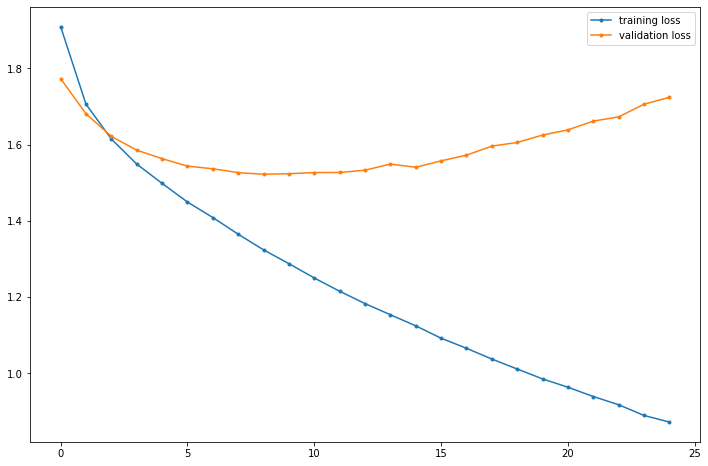

In [10]:
# Plot the learning curves
plt.figure(figsize = (12, 8))
plt.plot(train_epoch_loss, '-o', label = 'training loss', markersize = 3)
plt.plot(validation_epoch_loss, '-o', label = 'validation loss', markersize = 3)
plt.legend(loc = 'upper right');

In [11]:
# Load the moedl at the best epoch
state_dict = torch.load('./mlp/checkpoint_epoch_%s.pth' % (best_epoch))
print(state_dict.keys())
cifar_MLP.load_state_dict(state_dict)

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


<All keys matched successfully>

In [12]:
# calculate the overall accuracy
def predict_with_pytorch(model,input_data):
    model.eval()
    label_predicted_all_batch = []

    label_predicted_softmax = model(input_data)
    label_predicted_probability, label_predicted_index = torch.max(label_predicted_softmax.data, 1)
    
    for current_prediction in label_predicted_index:
        label_predicted_all_batch.append(current_prediction.detach().cpu().numpy().item())

    return label_predicted_all_batch

In [13]:
accuracy = list()
predicted_total = []
for batch_index, (test_image, test_label) in enumerate(testloader):
    if cuda:
        test_label_predicted = predict_with_pytorch(cifar_MLP,test_image.cuda())
        predicted_total.append(test_label_predicted)
    else:
        test_label_predicted = predict_with_pytorch(cifar_MLP,test_image)
        predicted_total.append(test_label_predicted)
    
    accuracy.append(accuracy_score(test_label,test_label_predicted))

print("Accuracy:", np.mean(accuracy)*100,"%")

Accuracy: 46.79999999999999 %


Text(0.5, 69.0, 'predicted labels')

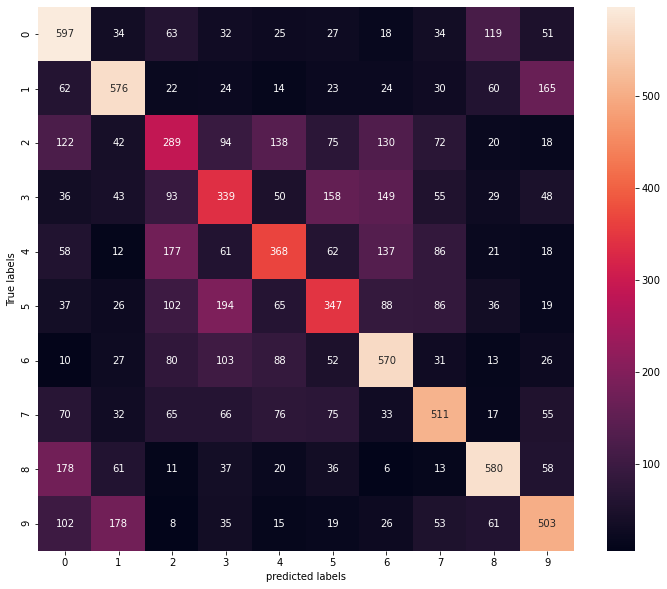

In [14]:
# confusion matrix
label_test = [testset[i][1] for i in range(10000)]
predicted_total = np.array(predicted_total).flatten()
CM = confusion_matrix(label_test, predicted_total)

plt.figure(figsize = (12,10))
sns.heatmap(CM, annot = True, annot_kws = {"size": 10}, fmt='d')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

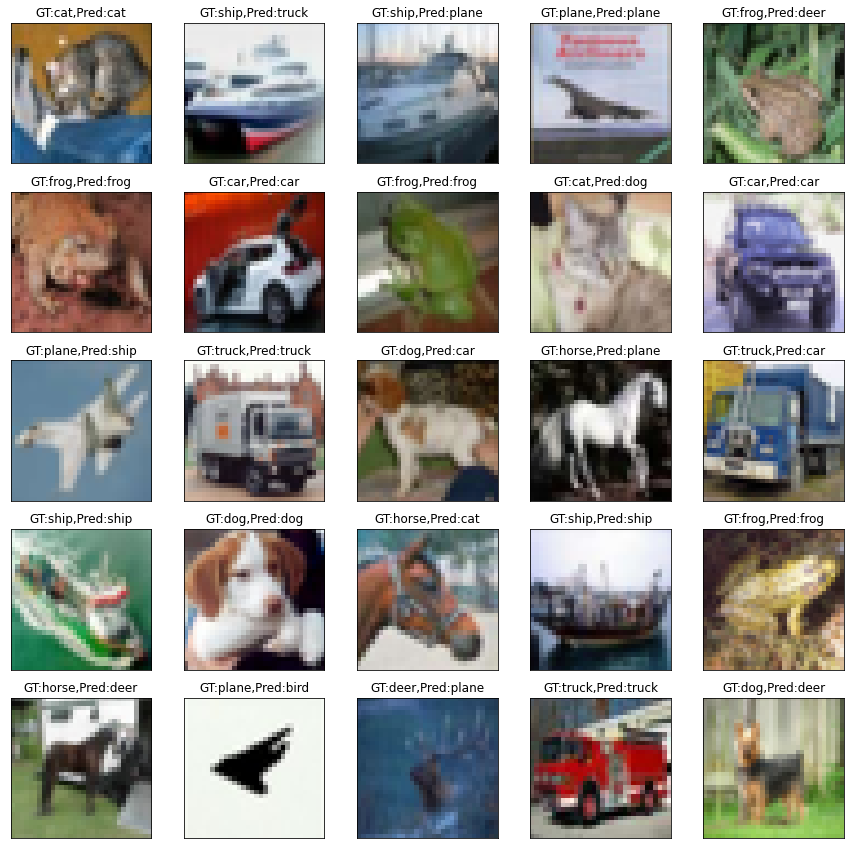

In [15]:
# plot the first 25 test images with the predicted label
row = 5
col = 5
fig = plt.figure(figsize=(15,15))

for i in range(0,row*col):
    image,label = testset[i]
    image = image/2 + 0.5
    npimage = image.numpy()
    npimage = np.transpose(npimage,(1,2,0))
    ax = fig.add_subplot(row,col,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(f"GT:{classes[label]},Pred:{classes[predicted_total[i]]}")
    plt.imshow(npimage)

plt.show()

#### Comment on the MLP model performance.

<span style="color:red">The Accuracy of our model is not high, since it only has 46.8% accuracy rate. The best epoch is 8 and that means we need early stopping of this model. The biggest reason that why the model doesn't work well is because the network is too simple and it is fully connected. Due to the fact that the fully connected network doesn't have receptive field, so it cannot extract local information (local semantics information) well, so it leads to the weak recognization ability. One thing we need to pay attention to is that after the 8 epoch, this model is overfitted gradually. Finally, if we want to improve the accuracy, training more epochs is unhelpful, and what we really need is to modify the structure of the model.</span>

### <span style="color:red">(15 pts.)</span> CNN model

#### Consider the LeNet-5 architecture introduced in the lecture notebook. Repeat the same procedure for that CNN model as you did for the MLP architecture.

<div align="center">
  <img src="https://github.com/soroush361/AoE_BME/blob/main/LeNet5_1.png?raw=true" />
</div>

##### We expect you to:
1. Modify the model so that it works with the CIFAR10 dataset.
2. Define an "Adam" optimizer with the learning rate of $0.001$.
3. Train the model on the training set and validate the model performance on the validation set for $25$ epochs. The loss function remains the same `CrossEntropy`.
4. Identify the best epoch.
5. Plot the learning curves.
6. Load the CNN model at the best epoch.
7. Report the overall accuracy on test set.
8. Plot the confusion matrix.
9. Finally, plot the first 25 samples of the test set with the ground truth and predicted labels.

Note: Don't forget to change the saving directory to `./cnn`. 

In [16]:
# Formula to calculate shape as we go through layer by layer = [(X - F + 2P)/S] + 1
# Here,
# X = Width / Height
# F = Kernel size
# P = Padding
# S = Strides (default = 1)

# Our input to the first layer is going to be [batchsize, 3, 32, 32]
# layer1 =[(32 - 5 + 2(0))/1] + 1= 28
# layer2 =[(28 - 2 )/2] + 1= 14
# layer3 =[(14 - 5 +2(0))/1] + 1 = 10
# layer4 =[(10 - 2)/2] + 1 = 5



class LeNet5Model(nn.Module):
    '''ConvNet -> ReLU -> Max_Pool -> ConvNet -> ReLU -> Max_Pool -> Reshape -> FC -> Sigmoid -> FC -> Sigmoid -> FC -> SoftMax -> Cross-Entropy'''
    def __init__(self):
        '''Define model modules.'''
        super(LeNet5Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 5, 1)
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5 * 5 * 16)
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

cifar_LeNet = LeNet5Model()

# If GPU available, move the model to GPU.
if cuda:
    cifar_LeNet.cuda()

print(cifar_LeNet)

LeNet5Model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [17]:
!mkdir cnn

In [18]:
# define the optimizer
optimizer = Adam(cifar_LeNet.parameters(),lr=0.001)

In [19]:
EPOCHS = 25

# Two lists to keep the losses at the end of each epoch.
train_epoch_loss = list()
validation_epoch_loss = list()


for epoch in range(EPOCHS):
    
    # A dummy list to keep the losses at the end of each iteration (one bacth forward and backward process).
    train_loss = list()
    valid_loss = list()
    # Set the model to train mode so that the parameters can be updated.
    cifar_LeNet.train()
    
    for batch_index, (train_image, train_label) in enumerate(trainloader):

        # If GPU is available, move the data to the GPU for faster computation.
        if cuda:
            train_label_predicted = cifar_LeNet(train_image.cuda())

            # compute the loss
            loss_f = torch.nn.CrossEntropyLoss()
            loss = loss_f(train_label_predicted, train_label.cuda())
            train_loss.append(loss.cpu().data.item())

            # reset the gradient 
            optimizer.zero_grad()
            # backpropagate the loss
            loss.backward()
            # update the parameters
            optimizer.step()
        
        # If GPU is not available.
        else:
            train_label_predicted = cifar_LeNet(train_image)
            loss_f = torch.nn.CrossEntropyLoss()
            # compute the loss
            loss = loss_f(train_label_predicted, train_label)
            train_loss.append(loss.data.item())

            # reset the gradient
            optimizer.zero_grad()
            # backpropagate the loss
            loss.backward()
            # update the parameters
            optimizer.step()
        
    # Take the average of iteration losses and append it to the epoch losses list
    train_epoch_loss.append(np.mean(train_loss))

    
    # Set the model to evaluation mode so that parameters are fixed.
    cifar_LeNet.eval()
    
    
    for batch_index, (valid_image, valid_label) in enumerate(validloader):
        # If GPU is available, move the data to the GPU for faster computation.
        if cuda:
            valid_label_predicted = cifar_LeNet(valid_image.cuda())

            # compute the loss
            loss_f = torch.nn.CrossEntropyLoss()
            loss = loss_f(valid_label_predicted, valid_label.cuda())
            valid_loss.append(loss.cpu().data.item())
        
        # If GPU is not available.
        else:
            valid_label_predicted = cifar_LeNet(valid_image)
            loss_f = torch.nn.CrossEntropyLoss()
            # compute the loss
            loss = loss_f(valid_label_predicted, valid_label)
            valid_loss.append(loss.data.item())
            
    validation_epoch_loss.append(np.mean(valid_loss))
    
    
    
    
    # save models
    torch.save(cifar_LeNet.state_dict(), './cnn/checkpoint_epoch_%s.pth' % (epoch))

    print("Epoch: {} | train_loss: {} | validation_loss: {}".format(epoch, train_epoch_loss[-1], validation_epoch_loss[-1]))

Epoch: 0 | train_loss: 1.9105794742703437 | validation_loss: 1.6553738939762115
Epoch: 1 | train_loss: 1.5578578379750252 | validation_loss: 1.5169945192337035
Epoch: 2 | train_loss: 1.4320164582133292 | validation_loss: 1.406560970544815
Epoch: 3 | train_loss: 1.3528561723232269 | validation_loss: 1.3552237582206725
Epoch: 4 | train_loss: 1.2873710088431836 | validation_loss: 1.3049976468086242
Epoch: 5 | train_loss: 1.2298823949694633 | validation_loss: 1.2760081839561463
Epoch: 6 | train_loss: 1.1776771065592766 | validation_loss: 1.2435732203722
Epoch: 7 | train_loss: 1.132194533199072 | validation_loss: 1.2107058650255202
Epoch: 8 | train_loss: 1.090580219477415 | validation_loss: 1.1890071445703507
Epoch: 9 | train_loss: 1.0545731191337109 | validation_loss: 1.181771542429924
Epoch: 10 | train_loss: 1.0227058458328246 | validation_loss: 1.1819180393218993
Epoch: 11 | train_loss: 0.992307960242033 | validation_loss: 1.1650953221321105
Epoch: 12 | train_loss: 0.9576608373224735 | v

In [20]:
# best epoch
best_epoch = np.argmin(validation_epoch_loss)
print('best epoch: ', best_epoch)

best epoch:  13


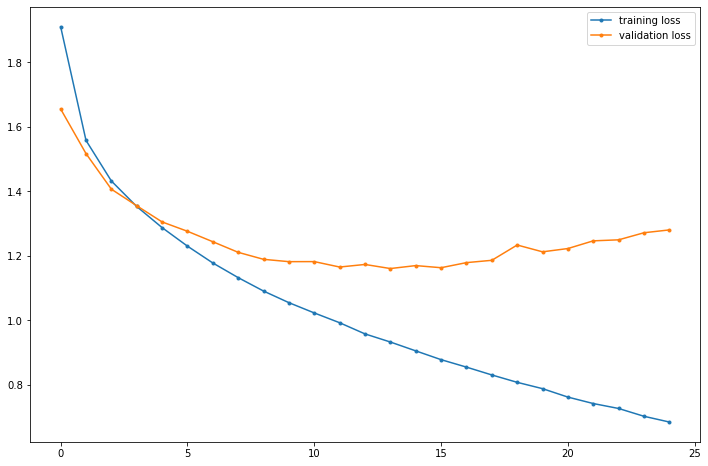

In [21]:
# learning curve
plt.figure(figsize = (12, 8))
plt.plot(train_epoch_loss, '-o', label = 'training loss', markersize = 3)
plt.plot(validation_epoch_loss, '-o', label = 'validation loss', markersize = 3)
plt.legend(loc = 'upper right');

In [22]:
# load the model at the best epoch 
state_dict = torch.load('./cnn/checkpoint_epoch_%s.pth' % (best_epoch))
print(state_dict.keys())
cifar_LeNet.load_state_dict(state_dict)

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


<All keys matched successfully>

In [23]:
# define function to calculate accuracy
def predict_with_pytorch(model,input_data):
    model.eval()
    label_predicted_all_batch = []

    label_predicted_softmax = model(input_data)
    label_predicted_probability, label_predicted_index = torch.max(label_predicted_softmax.data, 1)
    
    for current_prediction in label_predicted_index:
        label_predicted_all_batch.append(current_prediction.detach().cpu().numpy().item())

    return label_predicted_all_batch

In [24]:
# calculate the overall accuracy
accuracy = list()
predicted_total = []
for batch_index, (test_image, test_label) in enumerate(testloader):
    if cuda:
        test_label_predicted = predict_with_pytorch(cifar_LeNet,test_image.cuda())
        predicted_total.append(test_label_predicted)
    else:
        test_label_predicted = predict_with_pytorch(cifar_LeNet,test_image)
        predicted_total.append(test_label_predicted)
    
    accuracy.append(accuracy_score(test_label,test_label_predicted))

print("Accuracy:", np.mean(accuracy)*100,"%")

Accuracy: 60.010000000000005 %


Text(0.5, 69.0, 'predicted labels')

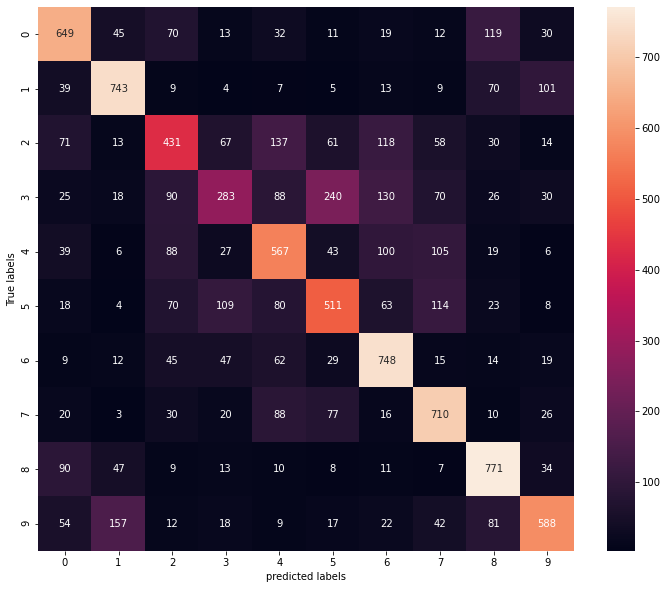

In [25]:
# confusion matrix
label_test = [testset[i][1] for i in range(10000)]
predicted_total = np.array(predicted_total).flatten()
CM = confusion_matrix(label_test, predicted_total)

plt.figure(figsize = (12,10))
sns.heatmap(CM, annot = True, annot_kws = {"size": 10}, fmt='d')
plt.ylabel('True labels')
plt.xlabel('predicted labels')

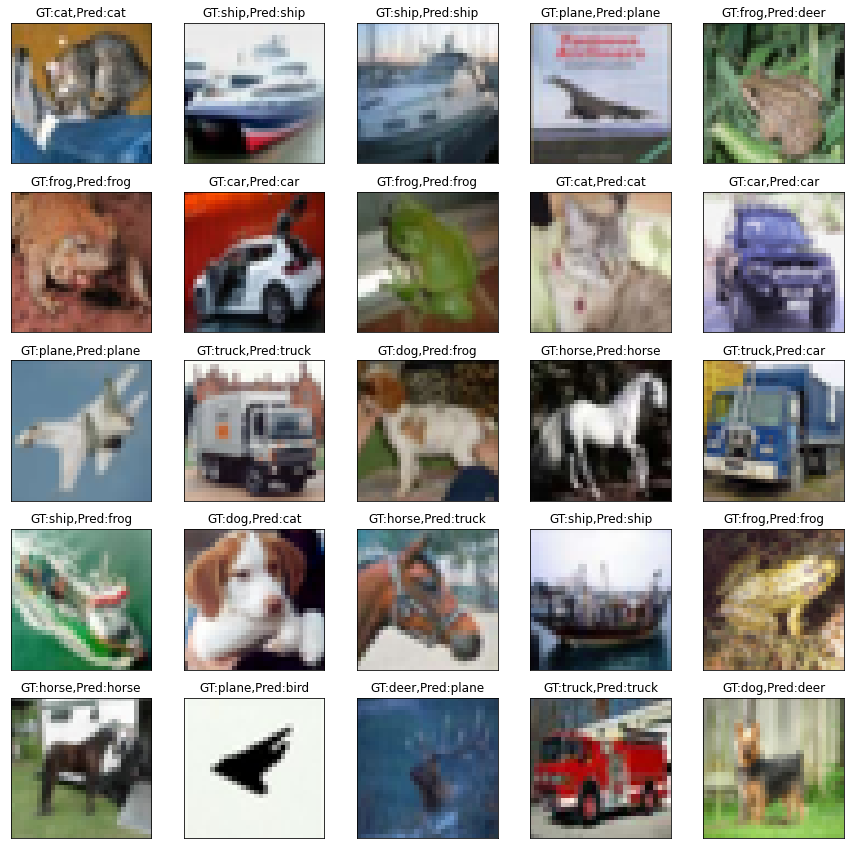

In [26]:
# plot the first 25 test images with the predicted label
row = 5
col = 5
fig = plt.figure(figsize=(15,15))

for i in range(0,row*col):
    image,label = testset[i]
    image = image/2 + 0.5
    npimage = image.numpy()
    npimage = np.transpose(npimage,(1,2,0))
    ax = fig.add_subplot(row,col,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(f"GT:{classes[label]},Pred:{classes[predicted_total[i]]}")
    plt.imshow(npimage)

plt.show()

### <span style="color:red">(5 pts.)</span> MLP vs. CNN model

#### Compare the performance of the CNN (LeNet-5) model versus the MLP model. 

<span style="color:red">Comparing these two models, the CNN model's accuracy is higher than MLP's. To be more specific, the accuracy of the LeNet is 60.1%, and it is 13.3% more than the accuracy of MLP, which means the performance of CNN model is better. By the idea of sharing weights, the CNN model has a higher efficiency as well as a higher accuracy, which means CNN is much better than MLP in the area of computer vision. Because the CNN does have a different receptive fields, so it can extract different local information (local semantics information) well in different layers, which leads to the powerful recognization ability.</span>

#### What would you recommend to improve the performance of the CNN model?

<span style="color:red">By observing the validation loss results, we could find the fact that the LeNet still suffers from an overfitting problem. There are many ways to solve this problem. For example, we could utilize dropout method, which essentially trains more models at one time as well as does predictions with these models after training, and finally use the average results from these models. As a result, this method could solve the overfitting problem in some extent and further improve the CNN's performance.</span>

<span style="color:red">We could also use penalties to restrict the complexity of the model, which could solve the overfitting problem samely. Eg, L1 loss and L2 loss.</span>

<span style="color:red">If we want to improve the performance of the CNN model directly, we need to make our model more deeper, and it will improve the accuracy without doubt, but it will stuck when the network is too deep, since the problem of gradient vanish, and in that case we need to use residual network to further improve the accuracy. </span>

<span style="color:red">Finally, we need to know that the preprocessing of the data is also important, so we could normalize our data, and a lot of cases show that normalization could definitely improve the ability of models. Meanwhile, the performance be improved not only by the normalization during the preprocessing period, but also the **batch normalization** between each layer during training.</span>